### Import the necessary data processing libraries 

In [4]:
import pandas as pd
import numpy as np
import os


In [5]:
pwd

'C:\\Users\\User'

In [6]:
# Change the working directory
os.chdir('C:/Users/User/Documents/')

# Confirm the current working directory
print("Current directory:", os.getcwd())


Current directory: C:\Users\User\Documents


### Import the datasets

In [8]:
# Load the data
interviewData = pd.ExcelFile("C:/Users/User/Documents/KTP/interview_data.xlsx")  

# View all the sheet names
print(interviewData.sheet_names)

# Load each worksheet into a data frame to inspect the data
exchange_rate_df = interviewData.parse('exchange rate')
stock_market_df = interviewData.parse('stock_market')
other_data_df = interviewData.parse('other_data')
yieldcurve_data_df = interviewData.parse('yieldcurve data')

['exchange rate', 'stock_market', 'other_data', 'yieldcurve data']


In [9]:
print(exchange_rate_df.head())

   Unnamed: 0   EURGBP
0  04.01.1999  0.71315
1  05.01.1999  0.71135
2  06.01.1999  0.70875
3  07.01.1999  0.70945
4  08.01.1999  0.70620


In [10]:
print(stock_market_df.head())

   Unnamed: 0    SP500  Nikkei225    DAX30   AllOrds  FTSE100  SPI (Swiss)  \
0  04.01.1999  1228.10   13415.89  5252.36  2832.576   5879.4      4650.22   
1  05.01.1999  1244.78   13232.74  5253.91  2815.634   5958.2      4709.14   
2  06.01.1999  1272.34   13468.46  5443.62  2853.444   6148.8      4781.92   
3  07.01.1999  1269.73   13536.56  5323.21  2897.301   6101.2      4716.70   
4  08.01.1999  1275.09   13391.81  5392.84  2856.305   6147.2      4767.01   

     SPTSX  
0  6554.30  
1  6660.50  
2  6805.34  
3  6802.19  
4  6868.93  


In [11]:
print(other_data_df.head())

   Unnamed: 0  BDI    Gold    WTI    VIX   TED
0  04.01.1999  784  287.70  12.38  26.17  0.68
1  05.01.1999  779  286.95  12.03  24.46  0.69
2  06.01.1999  791  288.30  12.83  23.34  0.70
3  07.01.1999  792  291.35  13.12  24.37  0.73
4  08.01.1999  791  291.35  13.10  23.28  0.67


In [12]:
print(yieldcurve_data_df.head())

   Unnamed: 0     L USD     S USD     C USD     L AUD  S AUD  C AUD     L EUR  \
0  04.01.1999  4.759535 -0.427642 -0.384156  4.680000  -0.42  -0.42  3.293271   
1  05.01.1999  4.794254 -0.459425 -0.351045  4.736667  -0.51  -0.41  3.335949   
2  06.01.1999  4.769879 -0.409810 -0.295026  4.773333  -0.55  -0.43  3.338814   
3  07.01.1999  4.787470 -0.511729 -0.347721  4.716667  -0.49  -0.47  3.343274   
4  08.01.1999  4.854896 -0.569924 -0.336401  4.776667  -0.58  -0.44  3.328278   

      S EUR     C EUR  ...     C CAD     L JPY     S JPY     C JPY     L GBP  \
0 -1.150498 -0.672838  ... -0.078979  1.172239 -1.762389 -1.020892  4.771684   
1 -1.006040 -0.839813  ... -0.019510  1.277865 -1.371475 -1.436054  4.781111   
2 -0.977658 -0.868914  ... -0.018301  1.236533 -1.253558 -1.449740  4.776456   
3 -0.958038 -0.912181  ... -0.131129  1.252904 -0.898223 -1.776914  4.682020   
4 -0.900446 -0.981036  ... -0.099832  1.031990 -1.640417 -0.784878  4.660127   

      S GBP     C GBP     L CHF 

### Data preparation and cleaning

In [14]:
# Step 1: Convert date columns to date format, rename it and standardize them for merging using function 
def preprocess_date(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df.iloc[:, 0], dayfirst=True)
    df.drop(columns=[df.columns[0]], inplace=True)
    return df

# Apply preprocessing
exchange_rate_df = preprocess_date(exchange_rate_df)
stock_market_df = preprocess_date(stock_market_df)
other_data_df = preprocess_date(other_data_df)
yieldcurve_data_df = preprocess_date(yieldcurve_data_df)

# Step 2: Merge all dataframes on the 'Date' column
mergedData_df = exchange_rate_df.merge(stock_market_df, on='Date', how='inner')
mergedData_df = mergedData_df.merge(other_data_df, on='Date', how='inner')
mergedData_df = mergedData_df.merge(yieldcurve_data_df, on='Date', how='inner')

# Display basic info and check for missing values
mergedData_info = {
    "shape": mergedData_df.shape,
    "missing_values": mergedData_df.isnull().sum().sort_values(ascending=False).head(10),
    "sample_data": mergedData_df.head()
}
mergedData_info


{'shape': (4041, 35),
 'missing_values': C CHF    180
 C JPY    180
 L JPY    180
 S JPY    180
 L CHF    180
 S CHF    180
 C GBP      0
 S GBP      0
 L GBP      0
 S AUD      0
 dtype: int64,
 'sample_data':     EURGBP       Date    SP500  Nikkei225    DAX30   AllOrds  FTSE100  \
 0  0.71315 1999-01-04  1228.10   13415.89  5252.36  2832.576   5879.4   
 1  0.71135 1999-01-05  1244.78   13232.74  5253.91  2815.634   5958.2   
 2  0.70875 1999-01-06  1272.34   13468.46  5443.62  2853.444   6148.8   
 3  0.70945 1999-01-07  1269.73   13536.56  5323.21  2897.301   6101.2   
 4  0.70620 1999-01-08  1275.09   13391.81  5392.84  2856.305   6147.2   
 
    SPI (Swiss)    SPTSX  BDI  ...     C CAD     L JPY     S JPY     C JPY  \
 0      4650.22  6554.30  784  ... -0.078979  1.172239 -1.762389 -1.020892   
 1      4709.14  6660.50  779  ... -0.019510  1.277865 -1.371475 -1.436054   
 2      4781.92  6805.34  791  ... -0.018301  1.236533 -1.253558 -1.449740   
 3      4716.70  6802.19  792  .

In [15]:
# Show the first few rows of each DataFrame to understand their structure
{
    "exchange_rate": exchange_rate_df.head(),
    "stock_market": stock_market_df.head(),
    "other_data": other_data_df.head(),
    "yieldcurve_data": yieldcurve_data_df.head()
}


{'exchange_rate':     EURGBP       Date
 0  0.71315 1999-01-04
 1  0.71135 1999-01-05
 2  0.70875 1999-01-06
 3  0.70945 1999-01-07
 4  0.70620 1999-01-08,
 'stock_market':      SP500  Nikkei225    DAX30   AllOrds  FTSE100  SPI (Swiss)    SPTSX  \
 0  1228.10   13415.89  5252.36  2832.576   5879.4      4650.22  6554.30   
 1  1244.78   13232.74  5253.91  2815.634   5958.2      4709.14  6660.50   
 2  1272.34   13468.46  5443.62  2853.444   6148.8      4781.92  6805.34   
 3  1269.73   13536.56  5323.21  2897.301   6101.2      4716.70  6802.19   
 4  1275.09   13391.81  5392.84  2856.305   6147.2      4767.01  6868.93   
 
         Date  
 0 1999-01-04  
 1 1999-01-05  
 2 1999-01-06  
 3 1999-01-07  
 4 1999-01-08  ,
 'other_data':    BDI    Gold    WTI    VIX   TED       Date
 0  784  287.70  12.38  26.17  0.68 1999-01-04
 1  779  286.95  12.03  24.46  0.69 1999-01-05
 2  791  288.30  12.83  23.34  0.70 1999-01-06
 3  792  291.35  13.12  24.37  0.73 1999-01-07
 4  791  291.35  13.10  

In [16]:
mergedData_df.isnull().sum().sort_values(ascending=False).head(10)

C CHF    180
C JPY    180
L JPY    180
S JPY    180
L CHF    180
S CHF    180
C GBP      0
S GBP      0
L GBP      0
S AUD      0
dtype: int64

In [17]:
# Handle missing values - Drop rows with any missing data
cleanData_df = mergedData_df.dropna()

In [18]:
mergedData_df.head()

,EURGBP,Date,SP500,Nikkei225,DAX30,AllOrds,FTSE100,SPI (Swiss),SPTSX,BDI,...,C CAD,L JPY,S JPY,C JPY,L GBP,S GBP,C GBP,L CHF,S CHF,C CHF
0,0.71315,1999-01-04,1228.10,13415.89,5252.36,2832.576,5879.4,4650.22,6554.30,784,...,-0.078979,1.172239,-1.762389,-1.020892,4.771684,0.985360,0.192370,3.307019,-0.792177,-0.803052
1,0.71135,1999-01-05,1244.78,13232.74,5253.91,2815.634,5958.2,4709.14,6660.50,779,...,-0.019510,1.277865,-1.371475,-1.436054,4.781111,0.932088,0.190153,3.297088,-0.852521,-0.790716
2,0.70875,1999-01-06,1272.34,13468.46,5443.62,2853.444,6148.8,4781.92,6805.34,791,...,-0.018301,1.236533,-1.253558,-1.449740,4.776456,0.921947,0.163316,3.284408,-0.844947,-0.781567
3,0.70945,1999-01-07,1269.73,13536.56,5323.21,2897.301,6101.2,4716.70,6802.19,792,...,-0.131129,1.252904,-0.898223,-1.776914,4.682020,0.827305,0.114520,3.282361,-0.838485,-0.786690
4,0.70620,1999-01-08,1275.09,13391.81,5392.84,2856.305,6147.2,4767.01,6868.93,791,...,-0.099832,1.031990,-1.640417,-0.784878,4.660127,0.829463,0.073365,3.262946,-0.799711,-0.834984


In [19]:
cleanData_df.isnull().sum().sort_values(ascending=False).head(10)

EURGBP    0
L JPY     0
L EUR     0
S EUR     0
C EUR     0
L CAD     0
S CAD     0
C CAD     0
S JPY     0
S AUD     0
dtype: int64

In [21]:
# Calculate the correlation matrix for the EURGBP and explanatory variables
# Exploring the correlation between the EUR/GBP exchange rate and the explanatory variables. 
# This will help in selecting the most relevant features for the model.
correlation_matrix = cleanData_df.corr()

# Display the correlation matrix focused on EURGBP
correlation_with_eurgbp = correlation_matrix['EURGBP'].sort_values(ascending=False)
print(correlation_with_eurgbp)


EURGBP         1.000000
Date           0.867878
Gold           0.854111
WTI            0.721541
SPTSX          0.547082
S JPY          0.533104
C JPY          0.440572
AllOrds        0.406846
SPI (Swiss)    0.308685
DAX30          0.271767
VIX            0.160630
TED           -0.014293
BDI           -0.017807
SP500         -0.040134
FTSE100       -0.049937
S AUD         -0.156449
L JPY         -0.328060
S CAD         -0.331373
C AUD         -0.367355
S USD         -0.432715
S CHF         -0.450999
C CAD         -0.468498
Nikkei225     -0.507061
C EUR         -0.554500
S EUR         -0.561358
L AUD         -0.599423
C CHF         -0.638752
C USD         -0.663300
L EUR         -0.792741
L CHF         -0.801898
L USD         -0.809119
S GBP         -0.838433
L GBP         -0.867349
L CAD         -0.889706
C GBP         -0.896817
Name: EURGBP, dtype: float64


### Model Development for Exchange Rate

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

# Step 1: Feature selection - choose economically relevant predictors (variables with strong correlations to EUR/GBP)

features = ['Gold', 'WTI', 'SPTSX', 'S JPY', 'C JPY', 'AllOrds']

X = cleanData_df[features]
y = cleanData_df['EURGBP']

# Step 2: Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Model coefficients for interpretation
coefficients = pd.Series(model.coef_, index=features)

{
    "R_squared": r2,
    "RMSE": rmse,
    "coefficients": coefficients.sort_values(ascending=False)
}


{'R_squared': 0.7796007322379055,
 'RMSE': 0.04629559714782124,
 'coefficients': C JPY      0.039526
 WTI        0.001039
 Gold       0.000185
 AllOrds    0.000003
 SPTSX     -0.000017
 S JPY     -0.051723
 dtype: float64}

In [33]:
# Step 3: Initialize and Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Use feature importances instead of coefficients for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=features)

{
    "R_squared": r2,
    "RMSE": rmse,
    "feature_importances": feature_importances.sort_values(ascending=False)
}



{'R_squared': 0.9958687569605915,
 'RMSE': 0.006182410876800891,
 'feature_importances': Gold       0.903120
 AllOrds    0.038177
 S JPY      0.021011
 WTI        0.017599
 SPTSX      0.011950
 C JPY      0.008144
 dtype: float64}

In [35]:
# Step 3: Initialize and Fit Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Use feature importances instead of coefficients for Random Forest
feature_importances = pd.Series(gb_model.feature_importances_, index=features)

{
    "R_squared": r2,
    "RMSE": rmse,
    "feature_importances": feature_importances.sort_values(ascending=False)
}


{'R_squared': 0.9837641956309273,
 'RMSE': 0.01225615929085803,
 'feature_importances': Gold       0.925627
 AllOrds    0.025539
 WTI        0.025083
 S JPY      0.012869
 SPTSX      0.008176
 C JPY      0.002705
 dtype: float64}

### Model Development for Volatility

In [53]:
# Volatility can be measured as the standard deviation of returns 
# The idea is to capture how much the EUR/GBP exchange rate fluctuates over a specified time window (e.g., daily, weekly, monthly).
# Calculate daily returns: Compute the daily percentage change in the EUR/GBP exchange rate.
# Estimate volatility: Use the rolling standard deviation of returns over a given window (e.g.30 days) to estimate volatility.

# Calculate the daily returns of the EUR/GBP exchange rate
cleanData_df['EURGBP_Returns'] = cleanData_df['EURGBP'].pct_change()

# Calculate the rolling 30-day volatility (standard deviation of returns)
cleanData_df['Volatility_30D'] = cleanData_df['EURGBP_Returns'].rolling(window=30).std()

In [55]:
# Display the first few rows of the data with volatility
cleanData_df[['Date', 'EURGBP', 'EURGBP_Returns', 'Volatility_30D']].head()

,Date,EURGBP,EURGBP_Returns,Volatility_30D
30,1999-02-15,0.6901,NaN,NaN
31,1999-02-16,0.6859,-0.006086,NaN
32,1999-02-17,0.6876,0.002478,NaN
33,1999-02-18,0.6846,-0.004363,NaN
34,1999-02-19,0.6824,-0.003214,NaN


In [57]:
# Drop any rows with missing values that may have appeared due to the rolling window
cleanData_df = cleanData_df.dropna(subset=['Volatility_30D'])

# Display the first few rows of the data with volatility
cleanData_df[['Date', 'EURGBP', 'EURGBP_Returns', 'Volatility_30D']].head()

,Date,EURGBP,EURGBP_Returns,Volatility_30D
60,1999-03-29,0.66420,0.001961,0.005532
61,1999-03-30,0.66500,0.001204,0.005472
62,1999-03-31,0.66880,0.005714,0.005575
63,1999-04-01,0.67355,0.007102,0.005721
64,1999-04-02,0.67300,-0.000817,0.005699


In [59]:
# Calculate the correlation between the volatility and explanatory variables
correlation_with_volatility = cleanData_df.corr()['Volatility_30D'].sort_values(ascending=False)

# Display the correlation values
correlation_with_volatility[['Volatility_30D']]


Volatility_30D    1.0
Name: Volatility_30D, dtype: float64

In [61]:
print(correlation_with_volatility)

Volatility_30D    1.000000
VIX               0.610052
EURGBP            0.302045
TED               0.280920
S JPY             0.069135
Gold              0.040021
L EUR             0.017915
EURGBP_Returns    0.016149
L JPY             0.011890
L CHF            -0.018942
Date             -0.024025
DAX30            -0.059650
C JPY            -0.061449
L CAD            -0.095220
L USD            -0.118834
WTI              -0.133206
L GBP            -0.159180
L AUD            -0.168263
C CAD            -0.173539
SPTSX            -0.173989
C GBP            -0.178690
FTSE100          -0.183345
S CHF            -0.194929
BDI              -0.220072
S USD            -0.224373
S EUR            -0.225195
SPI (Swiss)      -0.227878
Nikkei225        -0.232102
C EUR            -0.232119
S CAD            -0.233251
C CHF            -0.235923
S AUD            -0.269956
C USD            -0.276878
AllOrds          -0.315800
S GBP            -0.321257
SP500            -0.321712
C AUD            -0.336391
N

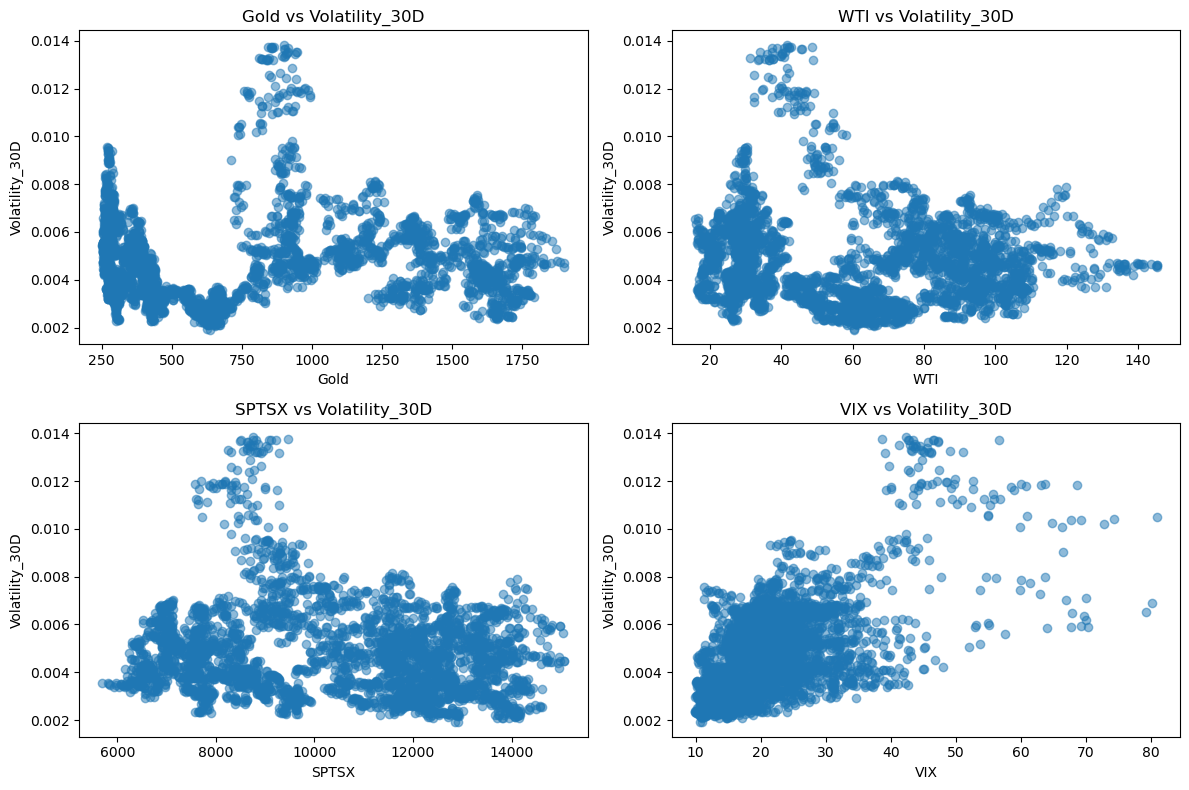

In [65]:
# Plot key variables (like Gold, WTI, SPTSX, and VIX) against volatility to visually assess any potential patterns
# Select key variables to plot against volatility
key_variables = ['Gold', 'WTI', 'SPTSX', 'VIX']

# Set up the figure
plt.figure(figsize=(12, 8))

# Loop over the selected variables and plot each against volatility
for i, var in enumerate(key_variables, 1):
    plt.subplot(2, 2, i)
    plt.scatter(cleanData_df[var], cleanData_df['Volatility_30D'], alpha=0.5)
    plt.title(f'{var} vs Volatility_30D')
    plt.xlabel(var)
    plt.ylabel('Volatility_30D')

# Display the plots
plt.tight_layout()
plt.show()


In [67]:
# Prepare the features (X) and target variable (y) for volatility prediction
X_volatility = cleanData_df[key_variables]
y_volatility = cleanData_df['Volatility_30D']

In [73]:
# Split the data into training and testing sets
X_train_volatility, X_test_volatility, y_train_volatility, y_test_volatility = train_test_split(X_volatility, y_volatility, test_size=0.2, random_state=42)


In [83]:
# Initialize and train both Random Forest and Gradient Boosting models
rf_volatility_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_volatility_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_volatility_model.fit(X_train_volatility, y_train_volatility)
gb_volatility_model.fit(X_train_volatility, y_train_volatility)

# Make predictions on the test set
rf_volatility_pred = rf_volatility_model.predict(X_test_volatility)
gb_volatility_pred = gb_volatility_model.predict(X_test_volatility)

# Calculate the performance metrics for both models
rf_volatility_mse = mean_squared_error(y_test_volatility, rf_volatility_pred)
rf_volatility_r2 = r2_score(y_test_volatility, rf_volatility_pred)

gb_volatility_mse = mean_squared_error(y_test_volatility, gb_volatility_pred)
gb_volatility_r2 = r2_score(y_test_volatility, gb_volatility_pred)

rf_volatility_mse, rf_volatility_r2, gb_volatility_mse, gb_volatility_r2


(2.3989070738519653e-07,
 0.9309192726166067,
 5.709604195203181e-07,
 0.8355819551431904)